In [29]:
import matplotlib.pyplot as plt
import numpy as np
from stoneforge.io.dlisio_r import inspect_dlis_structure, parse_dlis

inspect_dlis_structure("D:\dlis_samples\IODP_311-U1325A_rab-proc.dlis")

Logical Files Found: 3

Logical File: LogicalFile(RAB_shallow)
Total Frames: 2
 - Frame Name: B77185, Channels: 3
   * Mnemonic: TDEP, 	 Units: m, 	 Description: None
   * Mnemonic: BSIM, 	 Units: ohm.m, 	 Description: Shallow Button Resistivity Image
   * Mnemonic: BSAV, 	 Units: ohm.m, 	 Description: Average Shallow Button Resistivity
 - Frame Name: B77226, Channels: 7
   * Mnemonic: TDEP, 	 Units: 0.1 in, 	 Description: None
   * Mnemonic: DEVI, 	 Units: deg, 	 Description: Hole Deviation
   * Mnemonic: HAZI, 	 Units: deg, 	 Description: Hole Azimuth
   * Mnemonic: RB, 	 Units: deg, 	 Description: Relative Bearing
   * Mnemonic: P1NO, 	 Units: deg, 	 Description: Pad 1 Rotation Relative to North Azimuth
   * Mnemonic: P1AZ, 	 Units: deg, 	 Description: Pad 1 Azimuth
   * Mnemonic: GR, 	 Units: gAPI, 	 Description: Gamma Ray

Logical File: LogicalFile(RAB_medium)
Total Frames: 2
 - Frame Name: B77185, Channels: 3
   * Mnemonic: TDEP, 	 Units: m, 	 Description: None
   * Mnemonic: BMI

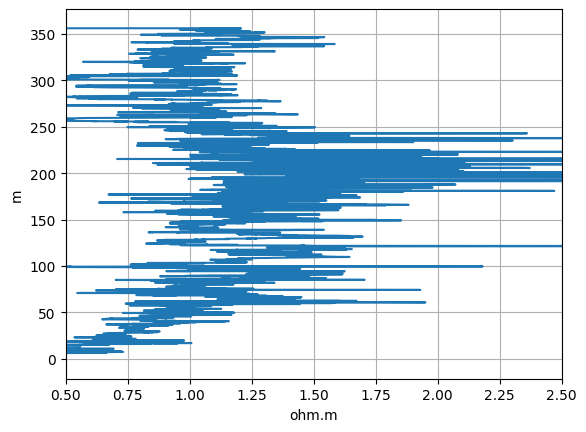

In [30]:
data_access = {
    'LogicalFile(RAB_shallow)':{
        'B77185':['TDEP','BSAV'],
        'B77226':['TDEP','RB','GR']
        },
    'LogicalFile(RAB_medium)':{
        'B77185':['TDEP','BMIM'],
        'B77226':['TDEP','GR']
        },
    'LogicalFile(RAB_deep)':{
        'B77226':['TDEP','GR'] 
        }
    }

data1 = parse_dlis("D:\dlis_samples\IODP_311-U1325A_rab-proc.dlis", data_access)
TDEP = data1['LogicalFile(RAB_shallow)']['B77185']['TDEP']['values']
TDEP_unit = data1['LogicalFile(RAB_shallow)']['B77185']['TDEP']['unit']
BSAV = data1['LogicalFile(RAB_shallow)']['B77185']['BSAV']['values']
BSAV_unit = data1['LogicalFile(RAB_shallow)']['B77185']['BSAV']['unit']
plt.plot(BSAV,TDEP)
plt.xlim(0.5,2.5)
plt.xlabel(BSAV_unit)
plt.ylabel(TDEP_unit)
plt.grid()
plt.show()

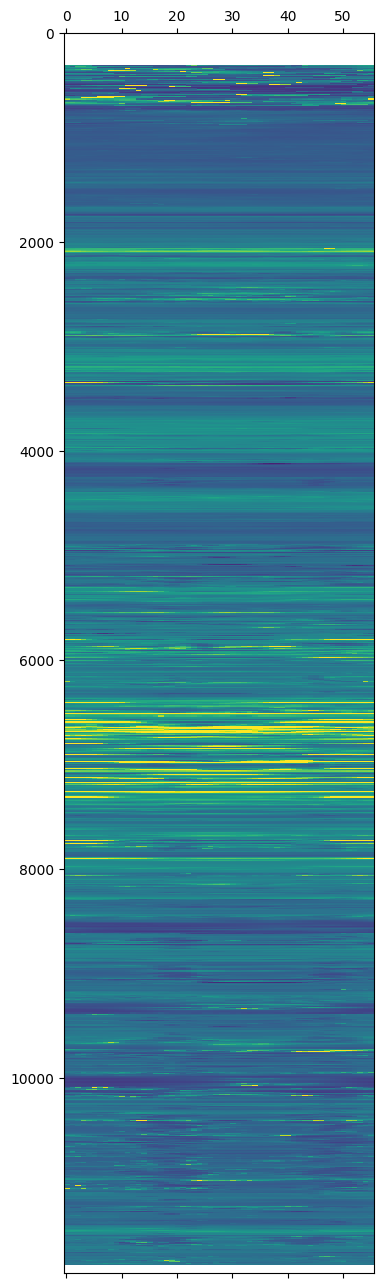

In [40]:
data2 = parse_dlis("D:\dlis_samples\IODP_311-U1325A_rab-proc.dlis", data_access)
BMIM = data1['LogicalFile(RAB_medium)']['B77185']['BMIM']['values']
BMIM_unit = data1['LogicalFile(RAB_medium)']['B77185']['BMIM']['unit']

BMIM[BMIM <= -999.] = np.nan

plt.matshow(BMIM, interpolation='nearest', aspect='auto', vmin=0, vmax=3)
plt.show()